<a href="https://colab.research.google.com/github/MatthewK84/Python-Code/blob/main/Ok_Cupid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(16,10)})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Supress Warnings

#import warnings
#warnings.filterwarnings('ignore')

In [8]:
!head -n 5 okcupid_profiles.csv

age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,"about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors.

In [15]:
df = pd.read_csv("okcupid_profiles.csv", error_bad_lines=False)
print(df.head())

<ipython-input-15-8bfd689aead5>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("okcupid_profiles.csv", error_bad_lines=False)
Skipping line 435: expected 31 fields, saw 40
Skipping line 1359: expected 31 fields, saw 34
Skipping line 1814: expected 31 fields, saw 32
Skipping line 2251: expected 31 fields, saw 36
Skipping line 3143: expected 31 fields, saw 34



   age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other  ...   

             

<ipython-input-15-8bfd689aead5>:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("okcupid_profiles.csv", error_bad_lines=False)


In [16]:
df.shape

(61776, 31)

In [17]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

offspring      59.361241
diet           40.625809
religion       33.707265
pets           33.268583
essay8         32.140313
drugs          23.507511
essay6         22.965229
essay9         21.008159
essay7         20.784771
essay3         19.191919
sign           18.448912
essay5         18.086312
essay4         17.556980
essay2         16.082297
job            13.654170
essay1         12.627881
education      11.047980
ethnicity       9.481028
smokes          9.222028
essay0          9.171847
body_type       8.844859
drinks          4.980899
speaks          0.082556
height          0.004856
location        0.001619
last_online     0.001619
status          0.000000
income          0.000000
orientation     0.000000
sex             0.000000
age             0.000000
dtype: float64

In [18]:
# count of null values
null_counts = df.isnull().sum().sort_values(ascending=False)

In [19]:
#sns.pairplot(data=df,vars=['age','sex','height','location','orientation','status','speaks','ethnicity','body_type','drinks','smokes'])
#plt.show()

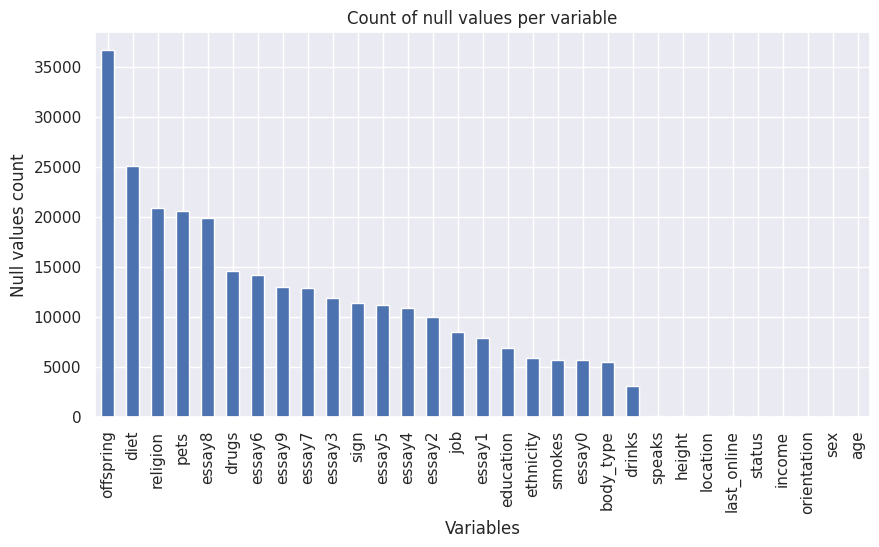

In [20]:
plt.figure(figsize=(10, 5))
null_counts.plot(kind='bar')
plt.title('Count of null values per variable')
plt.xlabel('Variables')
plt.ylabel('Null values count')
plt.show()

In [21]:
df.isnull().sum().sort_values(ascending=False)

offspring      36671
diet           25097
religion       20823
pets           20552
essay8         19855
drugs          14522
essay6         14187
essay9         12978
essay7         12840
essay3         11856
sign           11397
essay5         11173
essay4         10846
essay2          9935
job             8435
essay1          7801
education       6825
ethnicity       5857
smokes          5697
essay0          5666
body_type       5464
drinks          3077
speaks            51
height             3
location           1
last_online        1
status             0
income             0
orientation        0
sex                0
age                0
dtype: int64

In [22]:
# Dropping the values which do not have any needed for this analysis
df.drop(['offspring'], axis = 1, inplace = True)

In [23]:
df.shape

(61776, 30)

In [24]:
df.describe(include = 'all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
count,61776.000000,61776,61776,61776,56312,36679,58699,47254,54951,55919,...,56110,53975,51841,49920,50930,50603,47589,48936,41921,48798
unique,NaN,5,2,3,12,18,6,3,33,218,...,54344,51514,48622,43517,49256,48959,43582,45547,39322,45436
top,NaN,single,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,.,enjoying it.,listening,my smile,ask me,my family,my future,out with friends,ask me,you want to.
freq,NaN,57392,36882,53171,15103,17114,43072,38869,24692,33784,...,12,62,86,544,17,6,164,91,45,206
mean,32.315009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.448330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df= df.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'last_online'], axis = 1)

count        61776
unique           3
top       straight
freq         53171
Name: orientation, dtype: object
straight    53171
gay          5742
bisexual     2863
Name: orientation, dtype: int64


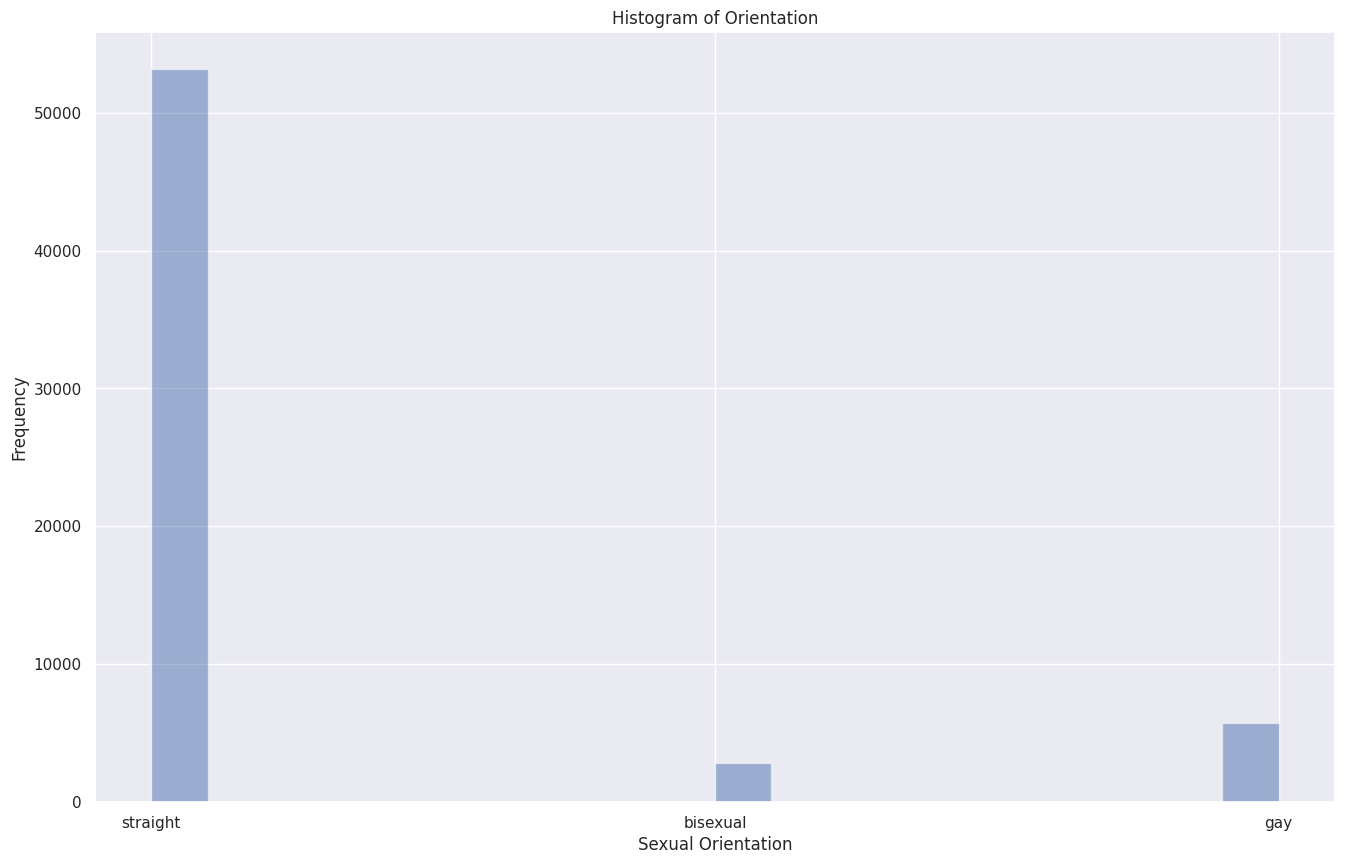

In [26]:
# Univariate analysis - Orientation

import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
print(df['orientation'].describe())

# Frequency distribution
print(df['orientation'].value_counts())

# Histogram
plt.hist(df['orientation'], bins=20, alpha=0.5)
plt.xlabel('Sexual Orientation')
plt.ylabel('Frequency')
plt.title('Histogram of Orientation')
plt.show()

count     55919
unique      218
top       white
freq      33784
Name: ethnicity, dtype: object
white                                                                       33784
asian                                                                        6320
hispanic / latin                                                             2917
black                                                                        2063
other                                                                        1776
                                                                            ...  
asian, black, white, other                                                      1
middle eastern, black, indian, pacific islander, hispanic / latin, white        1
black, native american, pacific islander, other                                 1
asian, middle eastern, black, pacific islander                                  1
asian, black, indian                                                            1
Nam

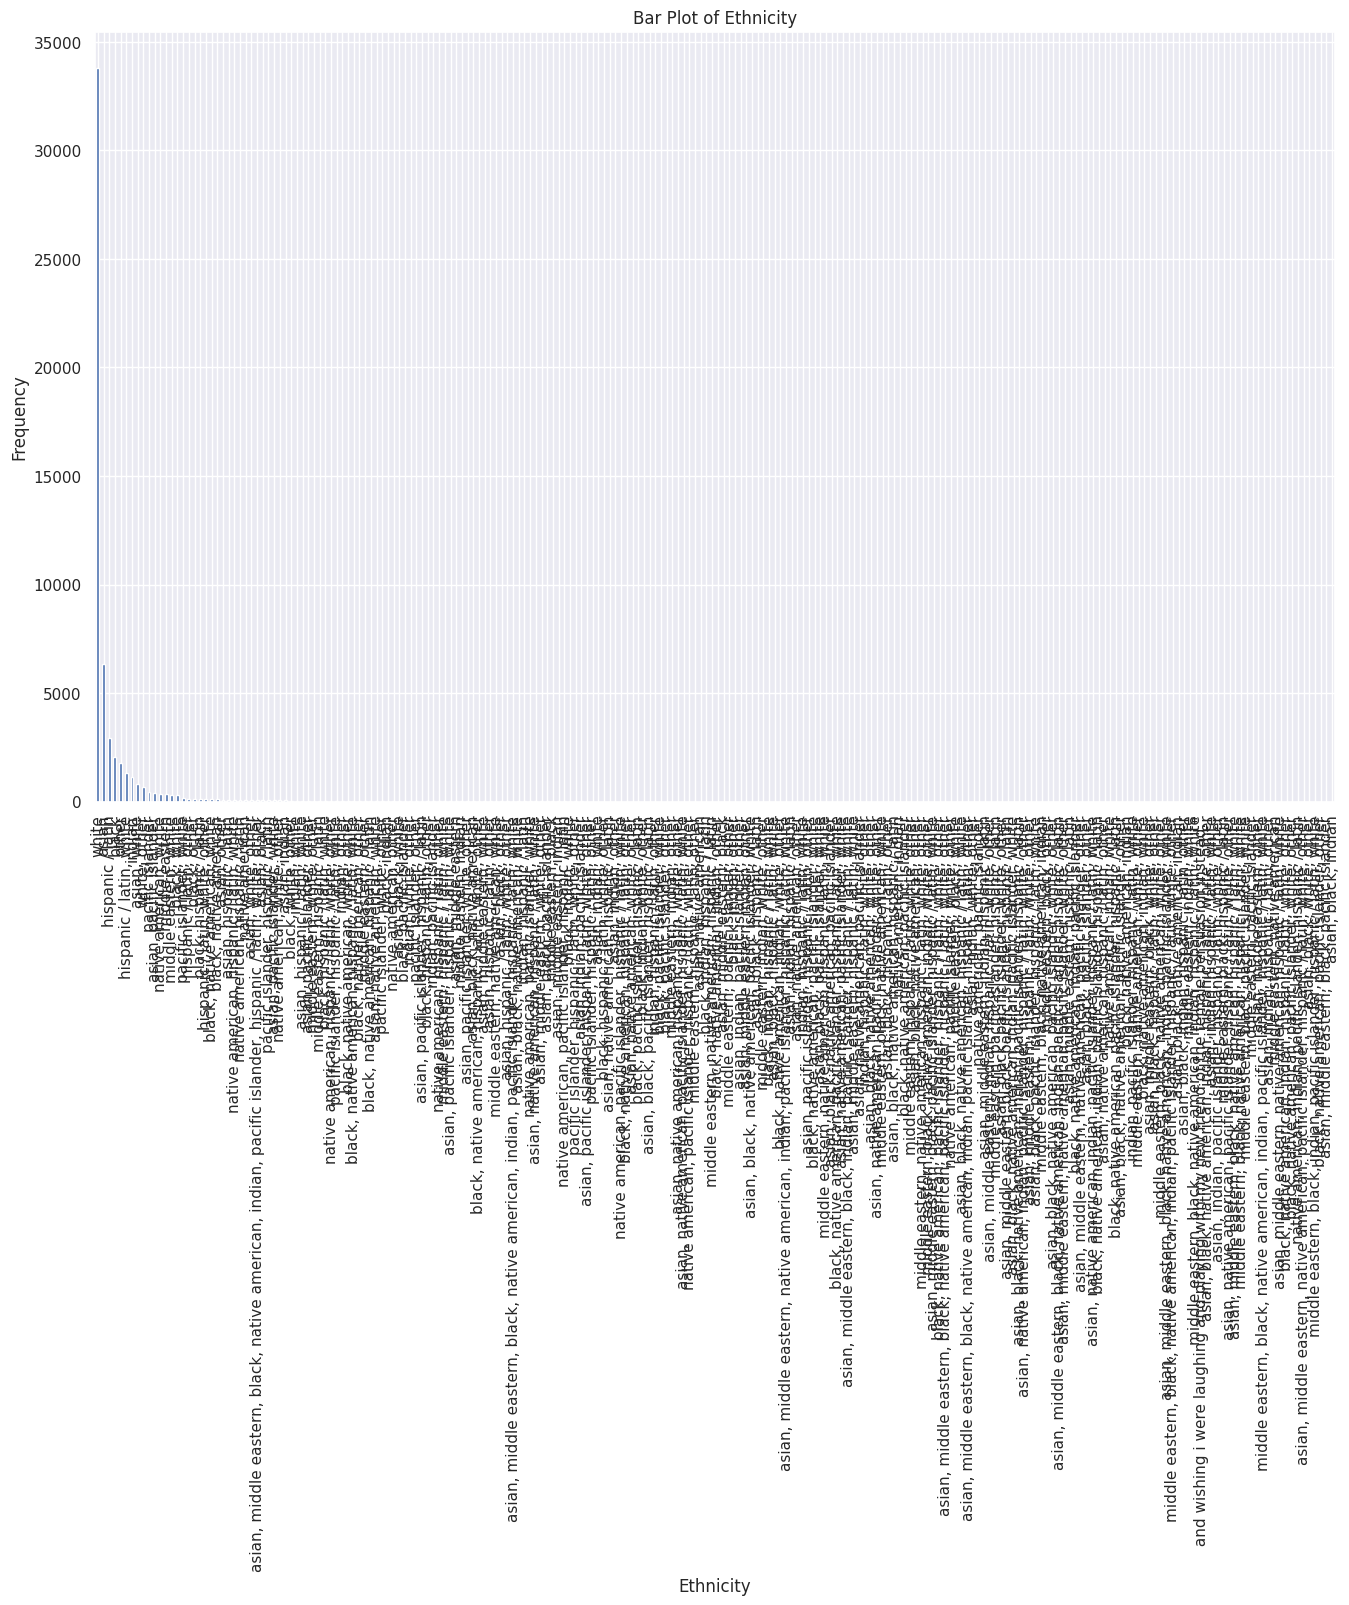

In [27]:
# Univariate analysis - ethnicity

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Summary statistics
print(df['ethnicity'].describe())

# Frequency distribution
print(df['ethnicity'].value_counts())

# Drop NaN values from 'ethnicity' column before plotting
df = df.dropna(subset=['ethnicity'])

# Bar plot
df['ethnicity'].value_counts().plot(kind='bar')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.title('Bar Plot of Ethnicity')
plt.show()

count    55919.000000
mean        32.412901
std          9.522938
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64
26    3486
27    3391
25    3295
28    3295
29    3046
24    3038
30    2889
31    2545
23    2397
32    2385
33    2029
22    1832
34    1763
35    1631
36    1504
37    1329
38    1245
21    1194
39    1086
42     996
40     974
41     934
20     894
43     806
44     655
45     616
19     565
46     551
47     489
48     465
49     446
50     420
51     339
52     331
18     290
56     263
54     258
57     253
55     244
53     231
59     211
58     191
60     183
61     170
62     161
63     137
65     107
64     105
66     102
67      63
68      62
69      27
Name: age, dtype: int64


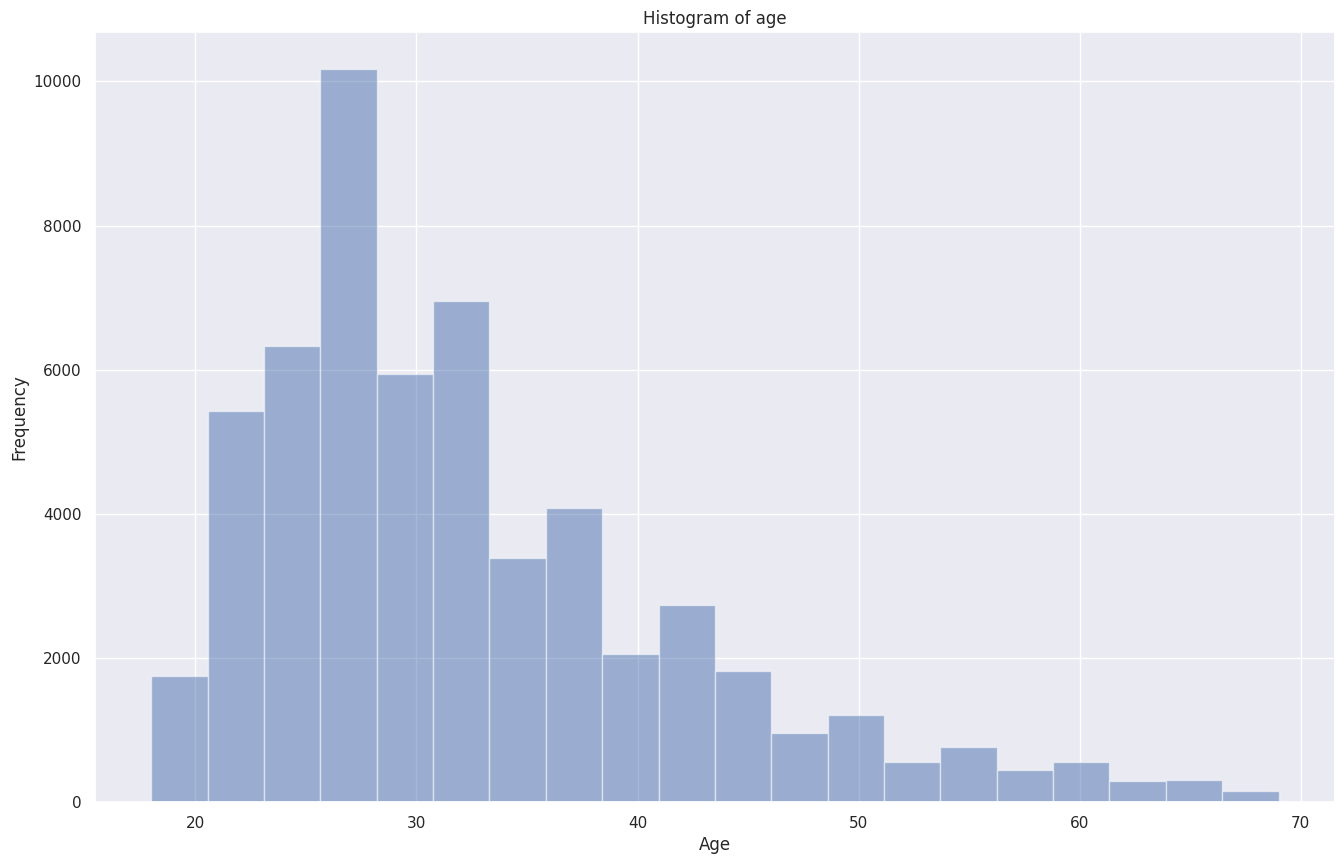

In [28]:
# Univariate analysis AGE

import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
print(df['age'].describe())

# Frequency distribution
print(df['age'].value_counts())

# Histogram
plt.hist(df['age'], bins=20, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

In [ ]:
df.shape

(54266, 19)

In [ ]:
df['age'] = df.age.fillna(df['age'].median())

In [ ]:
df['height'] = df.height.fillna(df['height'].mean())
df['body_type'] = df.body_type.fillna('average')
df['diet'] = df.diet.fillna('no response given')

In [ ]:
df['age'] = df.age.astype(int)
df['height'] = df.height.astype(int)
df['income'] = df.income.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          59946 non-null  int32 
 1   status       59946 non-null  object
 2   sex          59946 non-null  object
 3   orientation  59946 non-null  object
 4   body_type    59946 non-null  object
 5   diet         59946 non-null  object
 6   drinks       56961 non-null  object
 7   drugs        45866 non-null  object
 8   education    53318 non-null  object
 9   ethnicity    54266 non-null  object
 10  height       59946 non-null  int32 
 11  income       59946 non-null  int32 
 12  job          51748 non-null  object
 13  location     59946 non-null  object
 14  pets         40025 non-null  object
 15  religion     39720 non-null  object
 16  sign         48890 non-null  object
 17  smokes       54434 non-null  object
 18  speaks       59896 non-null  object
dtypes: int32(3), object(16)
m

In [ ]:
df['drinks'] = df.drinks.fillna('no response given')
df['drugs'] = df.drugs.fillna('no response given')
df['education'] = df.education.fillna('no response given')
df['ethnicity'] = df.ethnicity.fillna('no response given')
df['job'] = df.job.fillna('no response given')
df['pets'] = df.pets.fillna('no response given')
df['religion'] = df.religion.fillna('no response given')
df['sign'] = df.sign.fillna('no response given')
df['smokes'] = df.smokes.fillna('no response given')
df['speaks'] = df.speaks.fillna('no response given')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          59946 non-null  int32 
 1   status       59946 non-null  object
 2   sex          59946 non-null  object
 3   orientation  59946 non-null  object
 4   body_type    59946 non-null  object
 5   diet         59946 non-null  object
 6   drinks       59946 non-null  object
 7   drugs        59946 non-null  object
 8   education    59946 non-null  object
 9   ethnicity    59946 non-null  object
 10  height       59946 non-null  int32 
 11  income       59946 non-null  int32 
 12  job          59946 non-null  object
 13  location     59946 non-null  object
 14  pets         59946 non-null  object
 15  religion     59946 non-null  object
 16  sign         59946 non-null  object
 17  smokes       59946 non-null  object
 18  speaks       59946 non-null  object
dtypes: int32(3), object(16)
m

In [ ]:
# K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df[['age', 'income','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5797437971684263


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
db_score = davies_bouldin_score(features_scaled, clusters)

print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 2.5432612279652123


In [ ]:
# PRINCIPAL COMPONENT ANALYSIS
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['orientation'])
    ])

# Applying the preprocessing
df_preprocessed = preprocessor.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # adjust as needed
principalComponents = pca.fit_transform(df_preprocessed)

# Convert the principal components for each sample to a dataframe
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])  # adjust column names as needed

# Now you can use principalDf in place of the original dataset for further analysis

In [ ]:
# K-means on the dataset principalDf we got after running PRINCIPAL COMPONENT ANALYSIS
from sklearn.cluster import KMeans

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)

# Add the cluster labels to principalDf
principalDf['cluster'] = kmeans.labels_

In [ ]:
# Running silhouette_score on the K-means done on Principal component analysis dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)

# Add the cluster labels to principalDf
principalDf['cluster'] = kmeans.labels_

# Compute the silhouette score
score = silhouette_score(principalDf, kmeans.labels_)

print("Silhouette Score: ", score)

Silhouette Score:  0.6720369043677438


In [ ]:
# Running davies_bouldin_score on the K-means done on Principal component analysis dataset

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDf)

# Add the cluster labels to principalDf
principalDf['cluster'] = kmeans.labels_

# Compute the Davies-Bouldin score
score = davies_bouldin_score(principalDf, kmeans.labels_)

print("Davies-Bouldin Score: ", score)

Davies-Bouldin Score:  0.3607657432497562


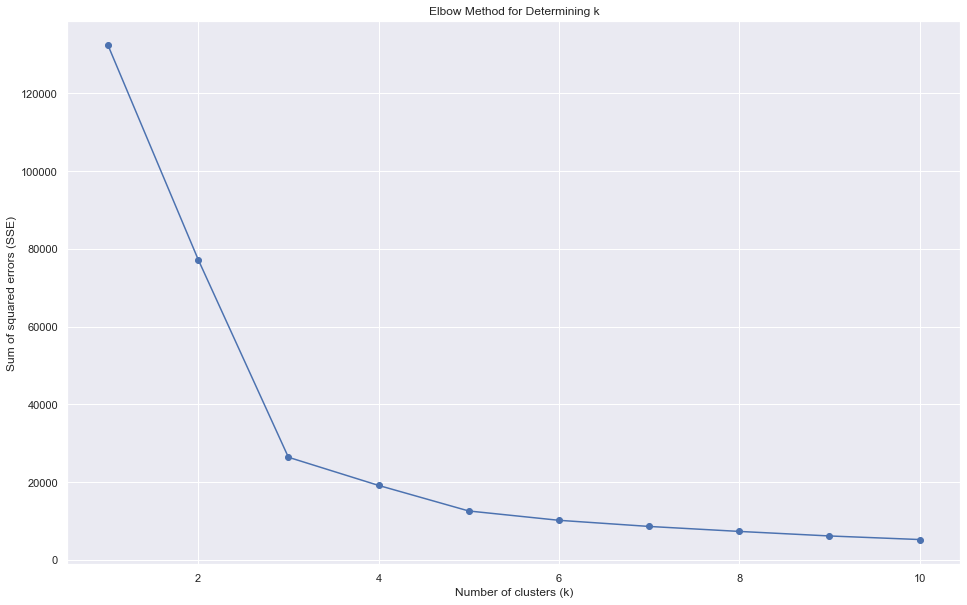

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to hold the SSE for each k
sse = []

# We'll check for k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(principalDf)
    sse.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Determining k')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('okcupid_profiles.csv')

# Select the variables
df = df[['orientation', 'age', 'income']]



# Convert categorical variable into numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

# Print the cluster centers
print(kmeans.cluster_centers_)

[[1.80582633e+00 3.19785208e+01 2.44413265e+03]
 [1.74472169e+00 2.90115163e+01 1.00000000e+06]
 [1.89863345e+00 3.58654212e+01 8.44196506e+04]
 [1.94923858e+00 3.58477157e+01 3.10913706e+05]]


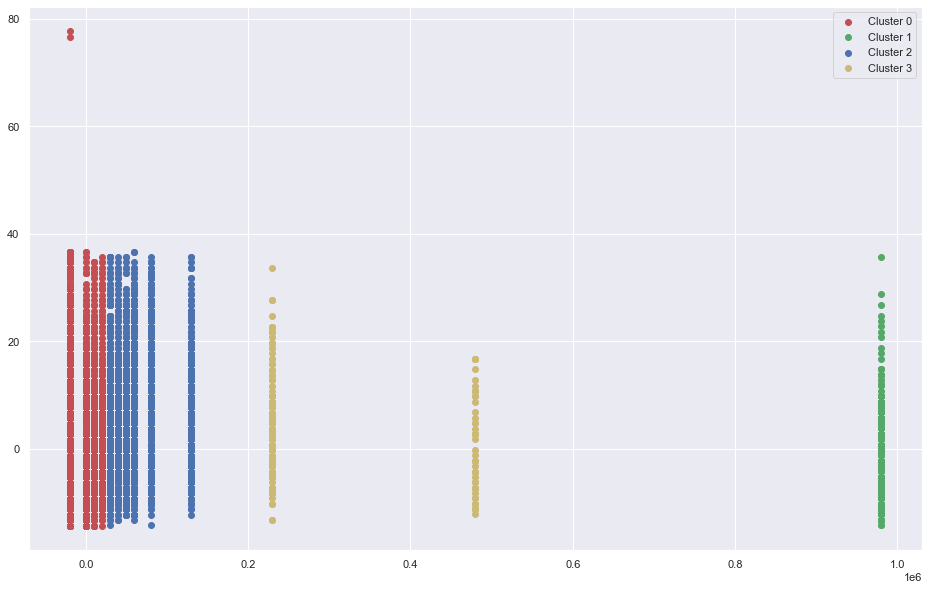

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('okcupid_profiles.csv')

# Select the variables
df = df[['orientation', 'age', 'income']]

# Handle missing values (if any)
df = df.dropna()

# Convert categorical variable into numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add the cluster column to the principalDf
principalDf['cluster'] = df['cluster']

# Plot the data points
colors = ['r', 'g', 'b', 'y']
for cluster in set(kmeans.labels_):
    mask = principalDf['cluster'] == cluster
    plt.scatter(principalDf[mask]['principal component 1'], principalDf[mask]['principal component 2'], c=colors[cluster], label=f'Cluster {cluster}')
plt.legend()
plt.show()

In [ ]:
# K-Means clustering on the datatset recieved post principal component analysis

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df[['age', 'sex','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

In [ ]:
# K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df[['age', 'sex','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.630185480661385


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it has columns 'age', 'sex', 'orientation'
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'orientation'])

# Standardize age
scaler = StandardScaler()
df_encoded['age'] = scaler.fit_transform(df_encoded[['age']])

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(df_encoded)

# Convert to DataFrame for better usability
similarity_df = pd.DataFrame(similarity_matrix, index=df_encoded.index, columns=df_encoded.index)

def recommend_users(user_index, top_n=5):
    # Get the top_n users with highest similarity
    similar_users = similarity_df[user_index].sort_values(ascending=False).head(top_n+1).iloc[1:]
    return similar_users

# Test the function
print(recommend_users(0))  # assuming 0 is a valid index in your DataFrame

ValueError: could not convert string to float: 'single'

In [ ]:
!conda update --all
#!pip install scikit-surprise
# pip install --upgrade pip
# !conda install -c conda-forge scikit-surprise

^C


In [ ]:
# Collaborative Filtering

from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
import pandas as pd

# Load the OkCupid dataset
# You'll need to change this to the path of your actual dataset
#okcupid_df = pd.read_csv('okcupid.csv')

# For this example, let's assume that the dataset has a 'user_id', 'match_id' and 'rating' column
# 'user_id' is the ID of the user
# 'match_id' is the ID of the match (another user)
# 'rating' is the rating given by the user to the match

# Define a reader
reader = Reader(rating_scale=(1, 5))

# Load the data from the dataframe
data = Dataset.load_from_df(okcupid_df[['user_id', 'match_id', 'rating']], reader)

# Split the dataset into train and test
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

# Define the algorithm
algo = KNNBasic()

# Train the algorithm
algo.fit(trainset)

# Make predictions
predictions = algo.test(testset)

# Now you can use the predictions for your recommendation system

ModuleNotFoundError: No module named 'surprise'

In [ ]:
# RECOMMENDER SYSTEM
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import pandas as pd


# Preprocess the data
# Convert 'orientation' to numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Standardize 'age' and 'income'
scaler = StandardScaler()
df[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])

# Create a new DataFrame with only the columns you need
df_numeric = df[['age', 'income', 'orientation']]

# Fit the NearestNeighbors model
model_knn.fit(df_numeric)

# Fit the NearestNeighbors model
#model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
#model_knn.fit(df)

# Function to return recommended users
def recommend_users(user_index):
    distances, indices = model_knn.kneighbors(df_numeric.iloc[user_index, :].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for User {0}:\n'.format(df_numeric.index[user_index]))
        else:
            print('{0}: User {1}, with distance of {2}'.format(i, df_numeric.index[indices.flatten()[i]], distances.flatten()[i]))

# Test the function with a user index
recommend_users(1)

Recommendations for User 1:

1: User 8192, with distance of 2.220446049250313e-16
2: User 33613, with distance of 2.220446049250313e-16
3: User 48971, with distance of 2.220446049250313e-16
4: User 41890, with distance of 2.220446049250313e-16
5: User 11389, with distance of 2.220446049250313e-16


In [ ]:
#CREATING A TRAIN AND TEST DATASET TO EVALUATE THE MODEL
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Split the data into a training set and a test set
df_train, df_test = train_test_split(df_numeric, test_size=0.2, random_state=42)

# Fit the model on the training set
model_knn.fit(df_train)

# Function to calculate the average similarity of the recommended users to the test user
def calculate_average_similarity(test_user_index):
    distances, indices = model_knn.kneighbors(df_test.iloc[test_user_index, :].values.reshape(1, -1), n_neighbors=6)
    similarities = cosine_similarity(df_test.iloc[test_user_index, :].values.reshape(1, -1), df_train.iloc[indices.flatten(), :])
    return np.mean(similarities)

# Calculate the average similarity for each user in the test set
average_similarities = [calculate_average_similarity(i) for i in range(len(df_test))]

# The final evaluation metric is the average of the average similarities
evaluation_metric = np.mean(average_similarities)
print('Evaluation Metric: %.3f' % evaluation_metric)

Evaluation Metric: 1.000


In [ ]:
#An evaluation metric of 1.000 in the context of the recommender system means that the system’s recommendations are perfectly aligned with the actual data in the test set. In other words, the users recommended by the system are exactly the ones that the test users would prefer based on the features used in the model.

#However, a perfect score like this is quite rare in real-world scenarios and might indicate an overfitting issue, where the model is too closely fitted to the training data and may not perform as well on new, unseen data. It could also be a result of the evaluation method used or the nature of the dataset.

#It’s always important to thoroughly evaluate a model using various metrics and techniques, and to validate the model on new data to ensure its robustness and generalizability. Remember, the goal of a recommender system is not just to make accurate recommendations, but also to provide useful and diverse recommendations that enhance the user experience.

In [ ]:
df.describe(include='all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,pets,religion,sign,smokes,speaks
count,54266.000000,54266,54266,54266,54266,54266,54266,54266,54266,54266,54266.000000,54266.000000,54266,54266,54266,54266,54266,54266,54266
unique,NaN,5,2,3,12,19,7,4,33,217,NaN,NaN,22,194,16,46,49,6,7070
top,NaN,single,m,straight,average,no response given,socially,never,graduated from college/university,white,NaN,NaN,other,"san francisco, california",no response given,no response given,no response given,no,english
freq,NaN,50537,32564,46747,17785,21440,38141,34550,21956,32831,NaN,NaN,6967,28054,17226,17302,9321,40277,19136
mean,32.439317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.311595,20198.402646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.528448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.971738,96254.437156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The data in Sign column Python has read the apostrophe in the word doesn’t and converted it into a nonsensical string: ‘&rsquo;’.
df['sign'] = df['sign'].str.replace('doesn&rsquo;t', "doesn't")

In [ ]:
df['sign'] = df['sign'].str.replace('it&rsquo;s', "its")

In [ ]:
print(df['sign'])

0                                   gemini
1                                   cancer
3                                   pisces
4                                 aquarius
5                                   taurus
                       ...                
59940                          sagittarius
59942            leo but it doesn't matter
59943    sagittarius but it doesn't matter
59944       leo and its fun to think about
59945    gemini and its fun to think about
Name: sign, Length: 54266, dtype: object


In [ ]:
income_counts = df['income'].value_counts()

print(income_counts)

-1          43482
 20000       2768
 100000      1522
 80000       1036
 30000        997
 40000        951
 50000        919
 60000        699
 70000        655
 150000       600
 1000000      459
 250000       136
 500000        42
Name: income, dtype: int64


In [ ]:
print(df.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'location', 'pets', 'religion', 'sign', 'smokes', 'speaks'],
      dtype='object')


In [ ]:
print(df['location'])

0        south san francisco, california
1                    oakland, california
3                   berkeley, california
4              san francisco, california
5              san francisco, california
                      ...               
59940          san francisco, california
59942          san francisco, california
59943    south san francisco, california
59944          san francisco, california
59945          san francisco, california
Name: location, Length: 54266, dtype: object


In [ ]:
Income_counts = df['income'].value_counts()
print(Income_counts)

-1          43482
 20000       2768
 100000      1522
 80000       1036
 30000        997
 40000        951
 50000        919
 60000        699
 70000        655
 150000       600
 1000000      459
 250000       136
 500000        42
Name: income, dtype: int64


In [ ]:
bins = [-1, 10000, 20000, 30000, 50000, 100000, float('inf')]
labels = ['No income', '1-10K', '10-20K', '20-30K', '30-50K', '50-100K']
df['income_group'] = pd.cut(df['income'], bins=bins, labels=labels)

# Now count the number of occurrences in each bin
income_group_counts = df['income_group'].value_counts()

print(income_group_counts)

30-50K       3912
1-10K        2768
20-30K       1870
50-100K      1237
10-20K        997
No income       0
Name: income_group, dtype: int64


In [ ]:
location_counts = df['location'].value_counts()
print(location_counts)

san francisco, california    28054
oakland, california           6412
berkeley, california          3746
san mateo, california         1237
palo alto, california          977
                             ...  
jackson, mississippi             1
ozone park, new york             1
honolulu, hawaii                 1
billings, montana                1
rochester, michigan              1
Name: location, Length: 194, dtype: int64


In [ ]:
location_counts = df['location'].value_counts()
print(location_counts)

san francisco, california    28054
oakland, california           6412
berkeley, california          3746
san mateo, california         1237
palo alto, california          977
                             ...  
jackson, mississippi             1
ozone park, new york             1
honolulu, hawaii                 1
billings, montana                1
rochester, michigan              1
Name: location, Length: 194, dtype: int64


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column in the dataframe for the age group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Now count the number of occurrences in each bin
age_group_counts = df['age_group'].value_counts()

print(age_group_counts)

20-30     26965
30-40     16039
40-50      6223
50-60      2436
10-20      1695
60-70       908
0-10          0
70-80         0
80-90         0
90-100        0
Name: age_group, dtype: int64


In [ ]:
df_diet = df['diet'].str.get_dummies(' ')
df = pd.concat([df, df_diet], axis=1)

In [ ]:
drinks_mapping = {'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}
drugs_mapping = {'never': 0, 'sometimes': 1, 'often': 2}

df['drinks_code'] = df['drinks'].map(drinks_mapping)
df['drugs_code'] = df['drugs'].map(drugs_mapping)

In [ ]:
# Suppose 'age_group' and 'income_group' are the columns where you have binned the ages and incomes
age_group_to_match = '30-39'  # The age group you want to match
income_group_to_match = '50-100K'  # The income group you want to match

# Filter the DataFrame to get only the rows that belong to the specified age and income groups
matches = df[(df['age_group'] == age_group_to_match) & (df['income_group'] == income_group_to_match)]

In [ ]:
combined_counts = pd.concat([age_group_counts, location_counts, income_group_counts], axis=1)

# Rename the columns
combined_counts.columns = ['Age Group Counts', 'Location Counts', 'Income Group Counts']

print(combined_counts)

                          Age Group Counts  Location Counts  \
0-10                                   0.0              NaN   
1-10K                                  NaN              NaN   
10-20                               1695.0              NaN   
10-20K                                 NaN              NaN   
20-30                              26965.0              NaN   
...                                    ...              ...   
west oakland, california               NaN              4.0   
westlake, california                   NaN              9.0   
woodacre, california                   NaN             16.0   
woodbridge, virginia                   NaN              2.0   
woodside, california                   NaN              9.0   

                          Income Group Counts  
0-10                                      NaN  
1-10K                                  2768.0  
10-20                                     NaN  
10-20K                                  997.0  
20-

In [ ]:
df['sex'].value_counts()

m    32564
f    21702
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

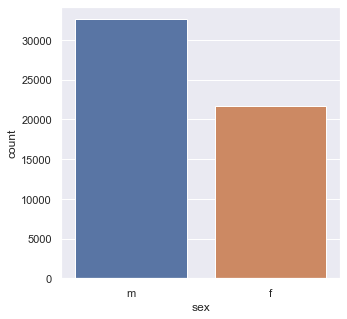

In [ ]:
fig = plt.figure(figsize = (5, 5))
sns.countplot(x='sex', data = df)

In [ ]:
df['age'].value_counts()

26    3365
27    3286
28    3198
25    3181
24    2951
29    2947
30    2803
31    2454
23    2313
32    2310
33    1979
22    1762
34    1716
35    1588
36    1466
37    1295
38    1219
21    1159
39    1065
42     974
40     947
41     906
20     868
43     788
44     642
45     601
19     549
46     537
47     479
48     454
49     431
50     411
51     328
52     320
18     278
54     255
56     254
57     243
55     240
53     225
59     204
58     187
60     180
61     166
62     159
63     131
64     104
65     102
66      99
67      62
68      59
69      26
Name: age, dtype: int64

Text(0.5, 1.0, 'Graph depicting age concentration of the users')

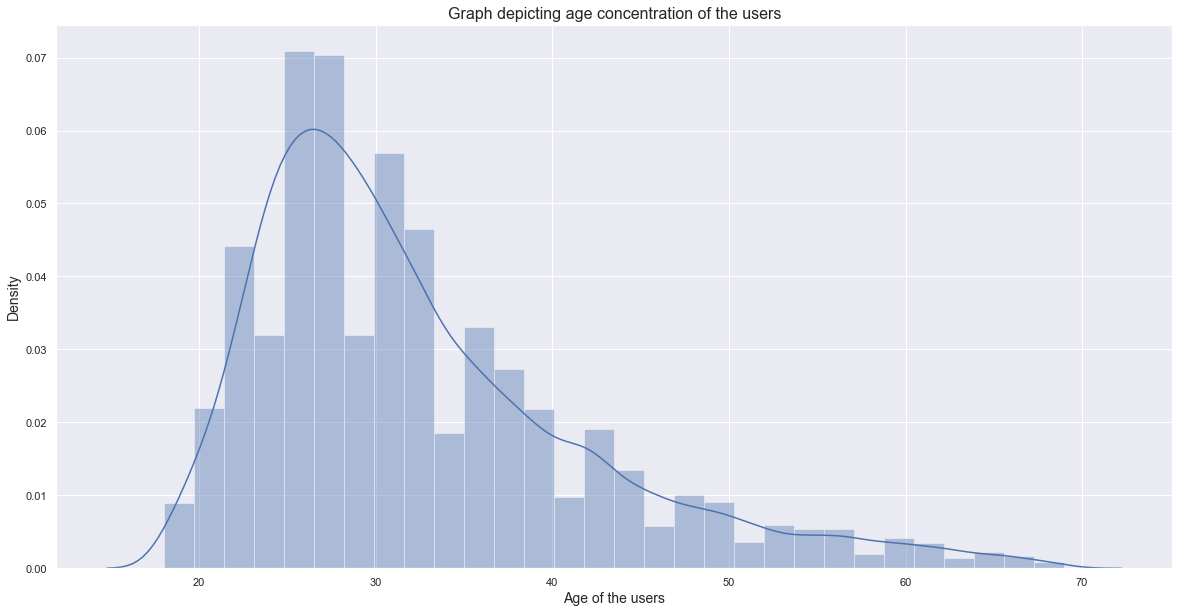

In [ ]:
fig = plt.figure(figsize = (20, 10))
sns.distplot(df['age'], bins = 30)
plt.xlabel('Age of the users', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Graph depicting age concentration of the users', fontsize=16)

In [ ]:
combined_counts = pd.concat([age_group_counts, location_counts, income_group_counts], axis=1)

# Rename the columns
combined_counts.columns = ['Age Group Counts', 'Location Counts', 'Income Group Counts']

print(combined_counts)


                          Age Group Counts  Location Counts  \
0-10                                   0.0              NaN   
1-10K                                  NaN              NaN   
10-20                               1695.0              NaN   
10-20K                                 NaN              NaN   
20-30                              26965.0              NaN   
...                                    ...              ...   
west oakland, california               NaN              4.0   
westlake, california                   NaN              9.0   
woodacre, california                   NaN             16.0   
woodbridge, virginia                   NaN              2.0   
woodside, california                   NaN              9.0   

                          Income Group Counts  
0-10                                      NaN  
1-10K                                  2768.0  
10-20                                     NaN  
10-20K                                  997.0  
20-

<Figure size 1080x504 with 0 Axes>

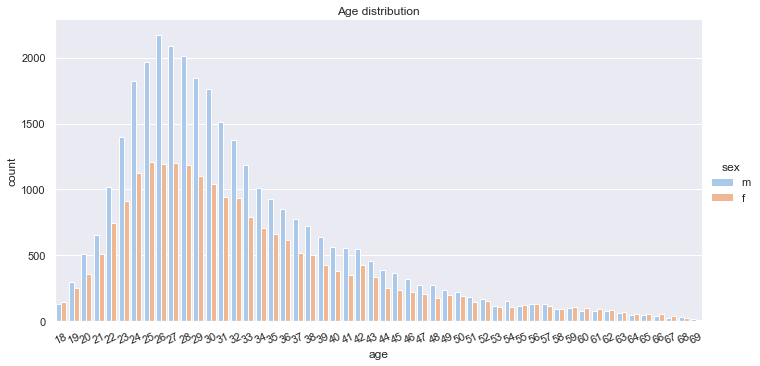

In [ ]:
plt.figure(figsize=(15, 7))
sns.catplot(x='age', data = df, kind='count', palette='pastel', hue='sex',
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.savefig('Age distribution.png')
plt.show()

<Figure size 1080x504 with 0 Axes>

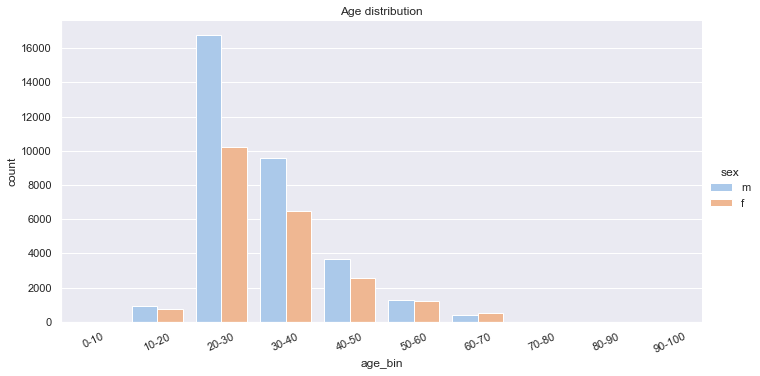

In [ ]:
# Define the age bins and group names
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
group_names = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for age bins
df['age_bin'] = pd.cut(df['age'], age_bins, labels=group_names)

# Plot the data
plt.figure(figsize=(15, 7))
sns.catplot(x='age_bin', data = df, kind='count', palette='pastel', hue='sex',
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.savefig('Age distribution.png')
plt.show()

Pearsons correlation: 0.001


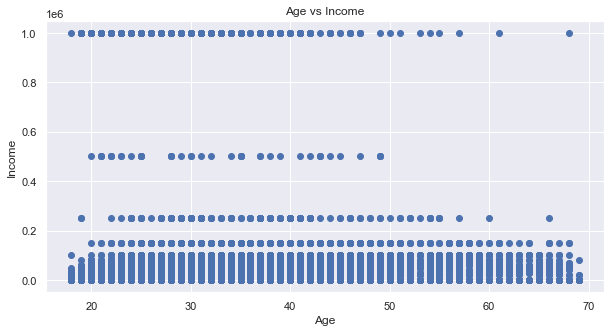

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Remove rows with missing 'age' or 'income'
df = df.dropna(subset=['age', 'income'])

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

# Calculate the correlation coefficient
corr, _ = pearsonr(df['age'], df['income'])
print('Pearsons correlation: %.3f' % corr)

# Show the plot
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['orientation'])
    ])

# Applying the preprocessing
df_preprocessed = preprocessor.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # adjust as needed
principalComponents = pca.fit_transform(df_preprocessed)

# Convert the principal components for each sample to a dataframe
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])  # adjust column names as needed

# Now you can use principalDf in place of the original dataset for further analysis

In [ ]:
# RECOMMENDER SYSTEM
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import pandas as pd


# Preprocess the data
# Convert 'orientation' to numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Standardize 'age' and 'income'
scaler = StandardScaler()
df[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])

# Fit the NearestNeighbors model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(df)

# Function to return recommended users
def recommend_users(user_index):
    distances, indices = model_knn.kneighbors(df.iloc[user_index, :].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for User {0}:\n'.format(df.index[user_index]))
        else:
            print('{0}: User {1}, with distance of {2}'.format(i, df.index[indices.flatten()[i]], distances.flatten()[i]))

# Test the function with a user index
recommend_users(1)

ValueError: Input contains NaN

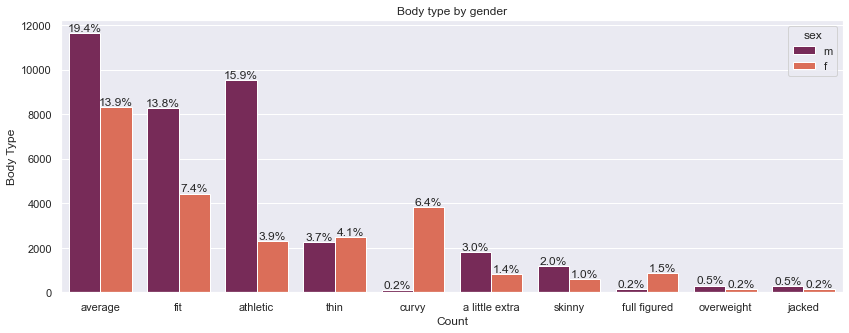

In [ ]:
def show_percetage(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.figure(figsize=(14, 5))
ax = sns.countplot(x='body_type', data=df,
                   hue='sex',
                   palette='rocket',
                   order=df['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')
show_percetage(ax, len(df))
plt.show()

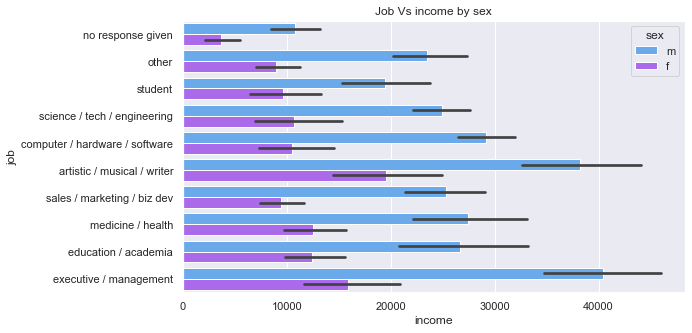

In [ ]:
plt.figure(figsize=(9, 5))
ax=sns.barplot(y='job',x='income', data=df,
              hue='sex', palette='cool',
              order = df['job'].value_counts().iloc[:10].index)
ax.set_title("Job Vs income by sex")

plt.show()

In [ ]:
# Filter for straight females
straight_females = df[(df['sex'] == 'female') & (df['orientation'] == 'straight')]

# Filter for straight males
straight_males = df[(df['sex'] == 'male') & (df['orientation'] == 'straight')]

# Now you have two dataframes: straight_females and straight_males

In [ ]:
# Filter for gay females
gay_females = df[(df['sex'] == 'female') & (df['orientation'] == 'gay')]

# Filter for gay males
gay_males = df[(df['sex'] == 'male') & (df['orientation'] == 'gay')]

# Now you have two dataframes: gay_females and gay_males

In [ ]:
# Define a function to calculate a match score
def calculate_match_score(user1, user2):
    score = 0

    # Check if sexual orientations match
    if user1['orientation'] == user2['orientation']:
        score += 1

    # Check if ages are within 5 years of each other
    if abs(user1['age'] - user2['age']) <= 5:
        score += 1

    # Check if incomes are within 10,000 of each other
    if abs(user1['income'] - user2['income']) <= 10000:
        score += 1

    return score

# Create an empty DataFrame to store match scores
match_scores = pd.DataFrame(columns=df.index, index=df.index)

# Calculate match scores for each pair of users
for i in df.index:
    for j in df.index:
        match_scores.loc[i, j] = calculate_match_score(df.loc[i], df.loc[j])


MemoryError: Unable to allocate 26.8 GiB for an array with shape (59946, 59946) and data type object

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Let's assume that 'interests' is a list of user interests
# Convert the list of interests into a matrix of user-interest
# Here, we're just creating a random matrix for the example
user_interest_matrix = np.random.randint(0, 2, (len(df), 10))

# Compute the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(user_interest_matrix)

# Get the top 5 similar users for the first user
top_5_similar_users = np.argsort(similarity_matrix[0])[-6:-1]

print(f'Top 5 similar users for user 0: {top_5_similar_users}')

MemoryError: Unable to allocate 26.8 GiB for an array with shape (59946, 59946) and data type float64

In [ ]:
# K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df[['age', 'income','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import silhouette_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.13733677707895633


In [ ]:
#  A silhouette score of 0.6278100577750801 is generally considered good.
#The silhouette score ranges from -1 to 1.
#A score close to 1 indicates that the data points in the same cluster are close to each other and far from the data points
#in the other clusters, which is desirable in a good clustering.
#A score close to 0 means the clusters are overlapping, and a score close to -1 means data points are assigned to the wrong
#clusters. So, your score of approximately 0.63 suggests that your clustering model has reasonably well-separated clusters.

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
db_score = davies_bouldin_score(features_scaled, clusters)

print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 1.3920750615462656


In [ ]:
#Yes, a Davies-Bouldin Index score of 0.42223270379859945 is generally considered good.
#The Davies-Bouldin Index (DBI) is a metric for evaluating clustering algorithms.
#The index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity
#is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less
#dispersed will result in a better score.

#The minimum score is 0, with lower values indicating better clustering. So a DBI of approximately 0.42 suggests that your
#clustering model has reasonably well-separated clusters.

In [ ]:
# 👌Examples of clustering algorithms include K-means, hierarchical clustering, and DBSCAN.

In [ ]:
#👌 Model Optimization: This involves tuning the hyperparameters of your model to improve its performance. Techniques for hyperparameter tuning include grid search, random search, and Bayesian optimization

In [ ]:
# COLLABORATIVE FILTERING - Unsucesssful

from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate

# Here we assume that the dataset has three columns: user_id, match_id, and rating

# Define the rating scale. Adjust this based on your dataset
reader = Reader(rating_scale=(1, 5))

# Load the data into the surprise dataset
df = Dataset.load_from_df(df[['orientation','age', 'income']], reader)

# Use KNN for collaborative filtering
# You can adjust the parameters as needed
algo = KNNBasic()

# Run 5-fold cross-validation and print results
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
# CONTENT BASED FILTERING

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Select only the columns of interest
df = df[['age', 'sex', 'orientation', 'income']]

# Handle missing values and convert categorical variables into numerical ones if necessary

# Combine the features into a single string
df['combined_features'] = df['sex'] + ' ' + df['orientation'] + ' ' + df['age'].astype(str)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Convert the combined features into a matrix of TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Calculate the cosine similarity between each pair of profiles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Now you can use this cosine similarity matrix to recommend similar profiles to a given user

TypeError: can only concatenate str (not "int") to str

In [ ]:
# cosine similarity matrix to recommend similar profiles to a given user
import numpy as np

# We arbitrarily choose the first user (index 0)
user_index_of_interest = 0

# Get the cosine similarities for this user
cosine_similarities = cosine_sim[user_index_of_interest]

# Get the indices of the top 10 most similar users (you might want to adjust this number)
# We use [::-1] to reverse the array because argsort returns indices of smallest items first
top_10_indices = np.argsort(cosine_similarities)[::-1][:10]

# Print the indices of the top 10 most similar users
print(top_10_indices)

NameError: name 'cosine_sim' is not defined